# Rotterdam stylized case

In [1]:
from classes import *
import copy
from collections import OrderedDict
import csv
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
#import ipywidgets as widgets
import pickle

import tqdm

from pdb import set_trace

from models import Rotty
from mayors import *

### Load the model with parameters

In [2]:
#global pars (for the development of Trust) Will be removed 
k = 0.2 
T_eq = 70
Rotty

Rotty 
-----------
allFloodProtection: 
No 3.5; Dike 4.5;  
-----------
allResidentialArea: 
Area_A Protected by:['No']
Area_B Protected by:['Dike']

Parameters : 
{'alarming_conditions': OrderedDict([(1, ['Major flood', 40]), (0, ['Small flood', 20]), (-0.2, ['Near miss', 10]), (-0.4, ['Major wake-up', 7]), (-1, ['Minor wake-up', 5]), (-10, ['Nothing happens', 0])]), 'Gumbel': OrderedDict([('mu', 2.33), ('beta', 0.234)]), 'I_experience_interp': {'xp': [0, 0.5], 'fp': [0, 1]}, 'I_social': 1}

### Load storm surge scenarios

In [3]:
# Load all SLR_Scenario
allSLR_Scenario = SLR_Scenario_from_pickles(os.path.join("SLR_projections","Transients"))

#for filename in os.listdir("SLR_projections"):
#    if filename.endswith(".csv"):
#        obj = SLR_Scenario(filename.split('.')[0]) #Init object with name derived from filename
#        obj.from_csv(os.path.join('SLR_projections',filename)) #Fill the object with data from the csv file


# Load all SurgeHeight (Realisations of extreme value distribution)
for filename in os.listdir("SurgeHeight"):
    if filename.endswith(".csv"):
        obj = SurgeHeight(filename.split('.')[0]) #Init object with name derived from filename
        obj.from_csv(os.path.join('SurgeHeight',filename)) #Fill the object with data from the csv file

# Create SurgeLevels by summing combinations of SLR_Scenario and SurgeHeights
for SLR_Scenario in allSLR_Scenario:
    for SurgeHeight in allSurgeHeight:
        combine_SurgeLevel(SLR_Scenario,SurgeHeight)

# Print all available SurgeHeights
for SH in allSurgeHeight:
    print(SH.name,end=' ||| ')        
        
# Print all available SLR scenarios
for SLR_Scenario in allSLR_Scenario:
    print(SLR_Scenario.name,end=' ||| ')
    


0 ||| 1 ||| 10 ||| 11 ||| 12 ||| 13 ||| 14 ||| 15 ||| 16 ||| 17 ||| 18 ||| 19 ||| 2 ||| 3 ||| 4 ||| 5 ||| 6 ||| 7 ||| 8 ||| 9 ||| Scenario_01 ||| Scenario_02 ||| Scenario_03 ||| Scenario_04 ||| Scenario_05 ||| Scenario_06 ||| Scenario_07 ||| Scenario_08 ||| Scenario_09 ||| 

### Run this block if you want to focus on a subset of the scenarios

In [9]:
# Make a manual preselection of scenarios to simplify plots
#transients = [0,1,2,3,4]
#transients = [str(i) for i in transients]
#selection = [x for x in allSurgeLevel if x.name.split("__")[1] in transients] #only run experiments for one of the transients
selection = allSurgeLevel
selected_scens = ['02']
#selection = [x for x in selection if x.name.split('__')[0] in ['SROCC_2019_RCP26_17','SROCC_2019_RCP85_50','SROCC_2019_RCP85_83','Bamber_2019_high_95']]
selection =  [x for x in selection if x.name.split('__')[0].split('_')[1] in selected_scens]
selection

[Scenario_02__0,
 Scenario_02__1,
 Scenario_02__10,
 Scenario_02__11,
 Scenario_02__12,
 Scenario_02__13,
 Scenario_02__14,
 Scenario_02__15,
 Scenario_02__16,
 Scenario_02__17,
 Scenario_02__18,
 Scenario_02__19,
 Scenario_02__2,
 Scenario_02__3,
 Scenario_02__4,
 Scenario_02__5,
 Scenario_02__6,
 Scenario_02__7,
 Scenario_02__8,
 Scenario_02__9]

### Load adaptation strategies (Mayors)

In [10]:
allMayors = [Reactive(),Economicus(),Sentiment(),Lawkeeper()]

### Model run algorithm

In [11]:
from run_model import run_model01

# Run the behaviour of one Mayor

In [12]:
#run one mayor:
mayor_experiments = []
for SurgeLevel in selection:
    experiment = run_model01(Rotty,SurgeLevel,Economicus(),do_print=True)
    mayor_experiments.append(experiment)
print('experiments finished')

Finished experiment Rotty_Scenario_02__0_H. Economicus 2020/10/07, 12:20:26
Finished experiment Rotty_Scenario_02__1_H. Economicus 2020/10/07, 12:20:26
Finished experiment Rotty_Scenario_02__10_H. Economicus 2020/10/07, 12:20:26
Finished experiment Rotty_Scenario_02__11_H. Economicus 2020/10/07, 12:20:27
Finished experiment Rotty_Scenario_02__12_H. Economicus 2020/10/07, 12:20:27
Finished experiment Rotty_Scenario_02__13_H. Economicus 2020/10/07, 12:20:27
Finished experiment Rotty_Scenario_02__14_H. Economicus 2020/10/07, 12:20:27
Finished experiment Rotty_Scenario_02__15_H. Economicus 2020/10/07, 12:20:28
Finished experiment Rotty_Scenario_02__16_H. Economicus 2020/10/07, 12:20:28
Finished experiment Rotty_Scenario_02__17_H. Economicus 2020/10/07, 12:20:28
Finished experiment Rotty_Scenario_02__18_H. Economicus 2020/10/07, 12:20:29
Finished experiment Rotty_Scenario_02__19_H. Economicus 2020/10/07, 12:20:29
Finished experiment Rotty_Scenario_02__2_H. Economicus 2020/10/07, 12:20:29
Fi

Target folder Visualisations\2020_10_7 already exists


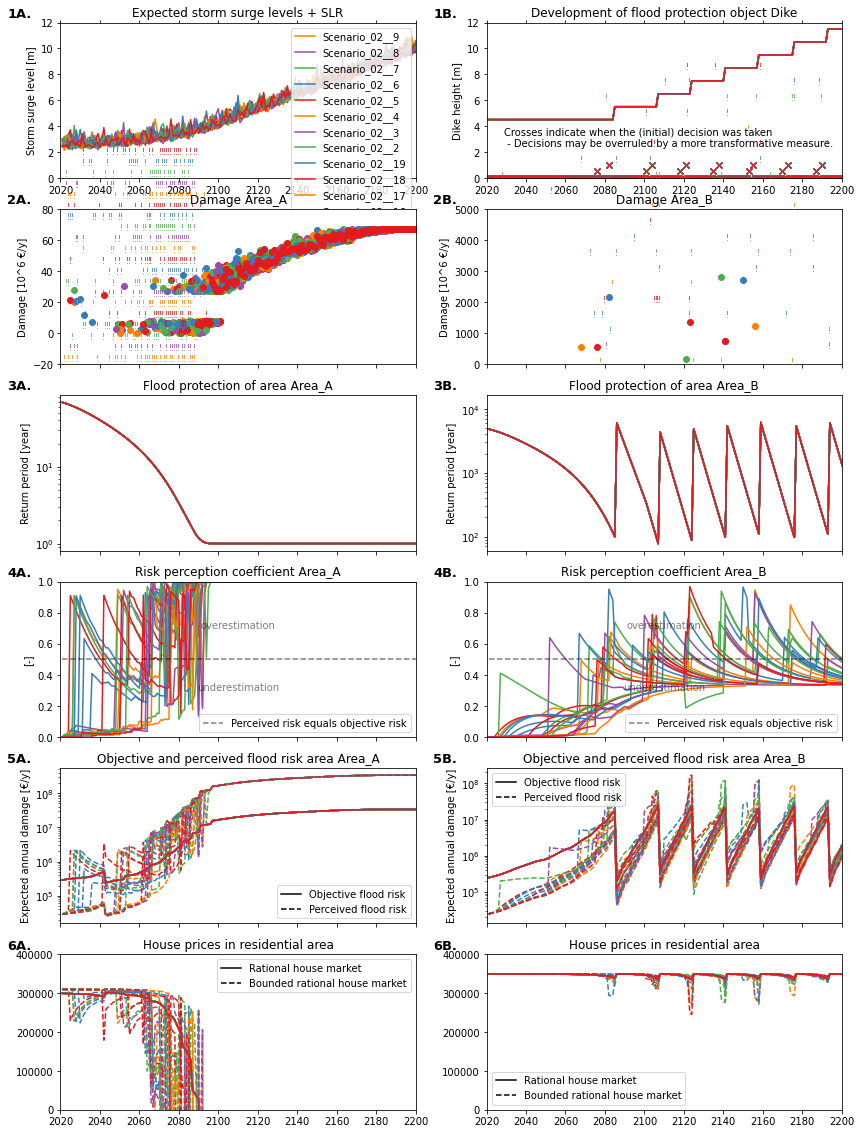

In [14]:
p1 = ['#e66101','#fdb863','#b2abd2','#5e3c99'] #palette
p2 = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']
p3 = ['#d7191c','#fdae61','#abdda4','#2b83ba']
p5 = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
p = p5 * 5
p.reverse()

nrows=6
ncols=2

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,sharey=False,sharex=True,figsize=(14,20))

labels = []

xlim = (2020,2200)

for j,experiment in enumerate(reversed(mayor_experiments)):
    
    Model = experiment.Model
    SurgeLevel = experiment.SurgeLevel
    Mayor = experiment.Mayor
    
    time = SurgeLevel.years
    
    axes[0,0].plot(time,SurgeLevel.surgelevel,color=p[j])

    labels.append(SurgeLevel.name)
    axes[0,0].set_title('Expected storm surge levels + SLR')
    #axes[0,0].set_xlabel('Time [year]')
    axes[0,0].set_ylabel('Storm surge level [m]')
    axes[0,0].set_ylim(0,12)
    axes[0,1].set_ylim(0,12)
    axes[0,1].set_ylabel('Dike height [m]')
    
    axes[0,0].set_xlim(xlim[0],xlim[1])
    
    axes[0,1].plot(time,Model.allFloodProtection[1].measure_history,'x',color=p[j]) #PLOT THE HISTORY OF THE MEASURES

    for i, Area in enumerate(Model.allResidentialArea):
        axes[0,i].tick_params(axis='x',reset=True) # to repeat the x-labels along the axes
       
           
        #plot damage
        axes[1,i].set_title('Damage {}'.format(Area.name))
        axes[1,i].plot(time,[x*10**(-6) for x in Model.allResidentialArea[i].flood_damage],'o',color=p[j])
        axes[1,i].set_ylabel('Damage [10^6 \u20ac/y]')
        #axes[1,i].tick_params(axis='x',reset=True) # to repeat the x-labels along the axes
    
        axes[2,i].set_title('Flood protection of area {}'.format(Model.allResidentialArea[i].name))
        axes[2,i].plot(time,Model.allResidentialArea[i].protection_level_rp,'-',color=p[j])
        axes[2,i].set_yscale("log")
        axes[2,i].set_ylabel('Return period [year]')
        #axes[2,i].tick_params(axis='x',reset=True) # to repeat the x-labels along the axes
    
        axes[3,i].set_title('Risk perception coefficient {}'.format(Model.allResidentialArea[i].name))
        axes[3,i].plot(time,Model.allResidentialArea[i].risk_perception,'-',color=p[j])
        axes[3,i].set_ylabel('[-]')
        axes[3,i].set_ylim(0,1)
        

        
        
        #axes[3,i].tick_params(axis='x',reset=True) # to repeat the x-labels along the axes
        
        axes[4,i].set_title('Objective and perceived flood risk area {}'.format(Model.allResidentialArea[i].name))
        unit_corr = [x * 10**6 for x in Model.allResidentialArea[i].risk]
        axes[4,i].plot(time,unit_corr,'-',color=p[j])
        axes[4,i].set_yscale("log")
        axes[4,i].set_ylabel('Expected annual damage [\u20ac/y]')
        #axes[4,i].tick_params(axis='x',reset=True) # to repeat the x-labels along the axes
        #Manually add legend patches
        custom_lines = [Line2D([0], [0], color='black',label='Objective flood risk',linestyle='-'),
                        Line2D([0], [0], color='black',label='Perceived flood risk',linestyle='--')]
        axes[4,i].legend(handles=custom_lines)
        
        unit_corr2 = [x * 10**6 for x in Model.allResidentialArea[i].risk_perceived]
        axes[4,i].plot(time,unit_corr2,'--',color=p[j])
        
        axes[5,i].set_title('House prices in residential area')
        axes[5,i].plot(time,Area.house_price_t_objective,color=p[j])
        custom_lines = [Line2D([0], [0], color='black',label='Rational house market',linestyle='-'),
                        Line2D([0], [0], color='black',label='Bounded rational house market',linestyle='--')]
        axes[5,i].legend(handles=custom_lines)
        axes[5,i].set_ylim(0,4e5)
        
        
        
        axes[5,i].plot(time,Area.house_price_t_subjective,'--',color=p[j])
        
        #axes[6,i].set_title('Development of trust in {} [DEPRECIATED]'.format(Area.name))
        #axes[6,i].plot(time,Model.allResidentialArea[i].trust_t,color=p[j])
        #axes[6,i].set_ylim(0,100)
    
    axes[0,1].plot(time,Model.allFloodProtection[1].protection_level,color=p[j])
    axes[0,1].set_title('Development of flood protection object Dike')
    
       
    #PLOT THE WAKE-UP CALL SIGNALS
    axes[1,0].set_ylim(-20,80)
    HP = Model.allResidentialArea[0]
    for i,year in enumerate(time[0:xlim[1]-xlim[0]]):
        text = HP.event_history[i]
        if text == "!":
            axes[1,0].text(year,-18 + 7 * j,text,color=p[j],fontsize=8)
            
    #PLOT THE WAKE-UP CALL SIGNALS
    axes[1,1].set_ylim(0,5000)
    CC = Model.allResidentialArea[1]
    for i,year in enumerate(time[0:xlim[1]-xlim[0]]):
        text = CC.event_history[i]
        if text == "!":
            axes[1,1].text(year,0 + 500 * j,text,color=p[j],fontsize=8)

axes[0,0].legend(labels)



axes[0,1].text(0.05,0.2,"Crosses indicate when the (initial) decision was taken \n - Decisions may be overruled by a more transformative measure.",transform=axes[0,1].transAxes)




        

#PRINT THE THRESHOLD PROTECTION LEVELS FOR THE LAWKEEPER MAYOR
if Mayor.get_name() == 'Lawkeeper':
    axes[2,1].plot(time,[Mayor.threshold_small]*len(time),color='black',linestyle='--',alpha=0.5)
    axes[2,1].plot(time,[Mayor.threshold_large]*len(time),color='black',linestyle='--',alpha=0.5)
    axes[2,1].text(2030,Mayor.threshold_small - 4000,'Threshold small measure',color='black',alpha=1)
    axes[2,1].text(2030,Mayor.threshold_large - 800,'Threshold large measure',color='black',alpha=1)
    
for j in [0,1]:
    alpha = 0.5
    color = 'black'
    axes[3,j].plot(time,[0.5]*len(time),color=color,linestyle='--',alpha = alpha)    
    #Manually add legend patches
    custom_line = [Line2D([0], [0], color=color, alpha=alpha,label='Perceived risk equals objective risk',linestyle='--')]
    axes[3,j].legend(handles=custom_line)
    axes[3,j].text(0.5,0.3,'underestimation',color=color,alpha=alpha,transform=axes[3,j].transAxes,ha='center')
    axes[3,j].text(0.5,0.7,'overestimation',color=color,alpha=alpha,transform=axes[3,j].transAxes,ha='center')


for nr in range(0,nrows):
    for l,letter in enumerate(('A','B')):
        axes[nr,l].text(-0.15, 1.1, "{}{}.".format(nr+1,letter), transform=axes[nr,l].transAxes,
                       fontsize=13, fontweight='bold', va='top')
    
#################################################################    
#################### SAVE THE EXPERIMENT ########################
#################################################################


filename = experiment.Mayor.get_name() + "_trans_" + experiment.SurgeLevel.name.split("__")[1]

#CREATE SUBFOLDER IN VISUALISATION WITH CURRENT DATE
today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)
foldername = date
target = os.path.join('Visualisations',foldername)
if not os.path.exists(target):
    os.mkdir(target)
else:
    print("Target folder {} already exists".format(target))
    

#fig.savefig(os.path.join(target,filename + "_inspect_transients.png"),bbox_inches='tight',dpi=150)

### Do SETP analysis on these experiments

In [23]:
window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

c1 = 0.15*350_000 #TODO: make different per RA (300,000 and 350,000)
c2 = 1e10 #variance
c3 = 10 #percent

for experiment in mayor_experiments:
    experiment.create_Metrics()

    for M in experiment.allMetrics:
        M.create_statistics() #Create summary statistics for the metric(t)
        M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin) #Evaluate the three tipping point criteria
        M.first_SETP = M.candidates['rapid change'].first_valid_index() #The first year in which a rapid change is found

    experiment.CC_first_SETP = experiment.allMetrics[3].first_SETP
    print(experiment.name,'-----------',experiment.CC_first_SETP)

Rotty_Scenario_02__0_H. Economicus ----------- 2123
Rotty_Scenario_02__1_H. Economicus ----------- None
Rotty_Scenario_02__10_H. Economicus ----------- 2141
Rotty_Scenario_02__11_H. Economicus ----------- None
Rotty_Scenario_02__12_H. Economicus ----------- None


D:\Python\Urban-SETP\classes.py:949: RuntimeWarning: invalid value encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a


Rotty_Scenario_02__13_H. Economicus ----------- None
Rotty_Scenario_02__14_H. Economicus ----------- 2158
Rotty_Scenario_02__15_H. Economicus ----------- None
Rotty_Scenario_02__16_H. Economicus ----------- None
Rotty_Scenario_02__17_H. Economicus ----------- None
Rotty_Scenario_02__18_H. Economicus ----------- None
Rotty_Scenario_02__19_H. Economicus ----------- None
Rotty_Scenario_02__2_H. Economicus ----------- 2123
Rotty_Scenario_02__3_H. Economicus ----------- None
Rotty_Scenario_02__4_H. Economicus ----------- 2123
Rotty_Scenario_02__5_H. Economicus ----------- None
Rotty_Scenario_02__6_H. Economicus ----------- None
Rotty_Scenario_02__7_H. Economicus ----------- 2139
Rotty_Scenario_02__8_H. Economicus ----------- None
Rotty_Scenario_02__9_H. Economicus ----------- None


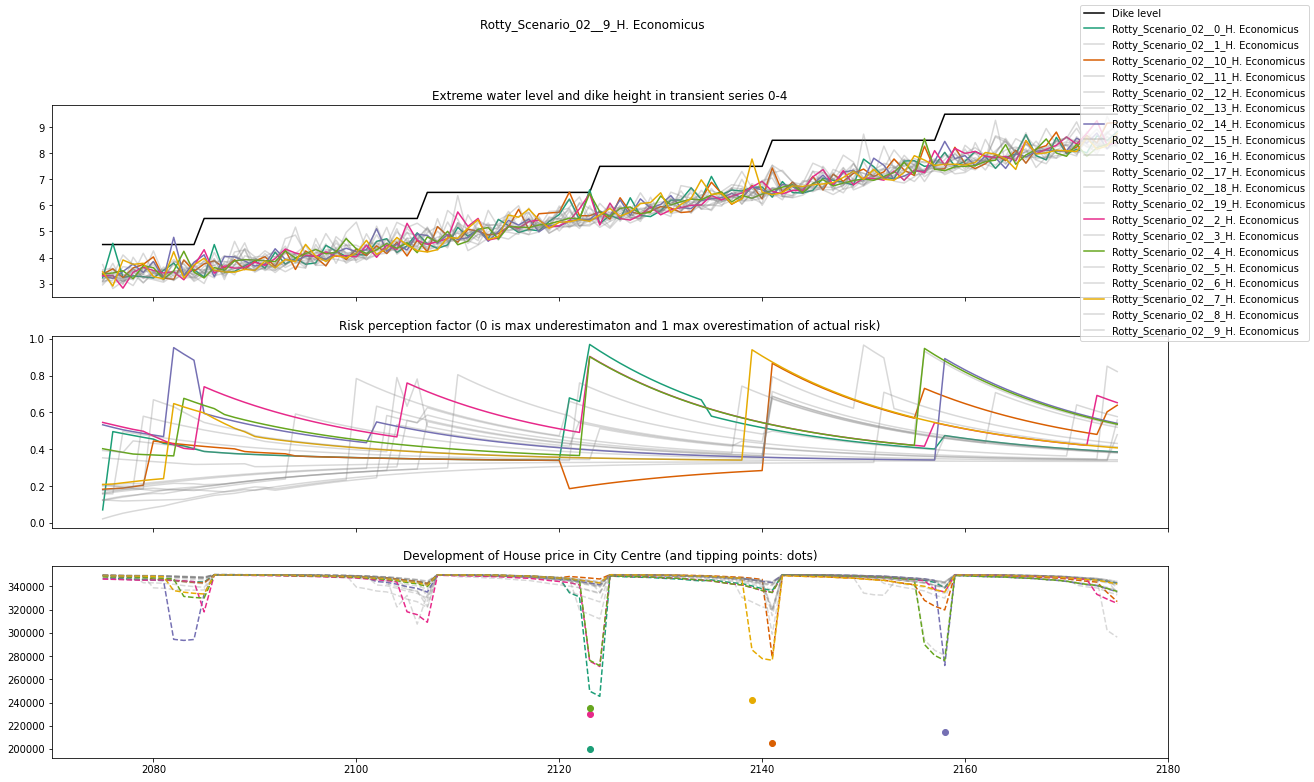

In [51]:
fig, axes = plt.subplots(3,1,figsize=(20,12),sharex=True)

legend = []



p = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02'] #6 color palette

j = 0

df['Dike_protection_level'].plot(ax=axes[0],color='black')
legend.append('Dike level')

for i,experiment in enumerate(mayor_experiments):
    df = experiment.to_df().loc[2075:2175]
    legend.append(experiment.name)
    if experiment.CC_first_SETP is not None:
        sel_color = p[j]
        alpha=1
        j += 1
        axes[2].plot(experiment.CC_first_SETP,200_000+2500*i,'o',color=sel_color)
    else:
        sel_color = 'grey'
        alpha=0.3
    df['surgelevel'].plot(ax=axes[0],color=sel_color,alpha=alpha)
    df['Area_B_risk_perception'].plot(ax=axes[1],color=sel_color,alpha=alpha)
    df['Area_B_house_price_t_subjective'].plot(ax=axes[2],color=sel_color,linestyle='--',alpha=alpha)
    
axes[0].set_title('Extreme water level and dike height in transient series 0-4')
axes[1].set_title('Risk perception factor (0 is max underestimaton and 1 max overestimation of actual risk)')
axes[2].set_title('Development of House price in City Centre (and tipping points: dots)')

fig.suptitle('{}'.format(experiment.name))

fig.legend(labels=legend)

filename = "box_1_clustered"
fig.savefig(os.path.join(target,filename + ".png"),bbox_inches='tight',dpi=150)

In [57]:
legend

['Rotty_Scenario_02__0_H. Economicus',
 'Rotty_Scenario_02__1_H. Economicus',
 'Rotty_Scenario_02__2_H. Economicus',
 'Rotty_Scenario_02__3_H. Economicus',
 'Rotty_Scenario_02__4_H. Economicus']

In [42]:
df.columns

Index(['name', 'surgelevel', 'Dike_protection_level', 'Dike_measure_history',
       'Area_A_event_history', 'Area_A_nearmiss_history',
       'Area_A_flood_damage', 'Area_A_risk_household',
       'Area_A_risk_household_perceived', 'Area_A_risk_household_discounted',
       'Area_A_risk_household_discounted_perceived',
       'Area_A_protection_level_rp', 'Area_A_risk_perception',
       'Area_A_risk_perceived', 'Area_A_house_price_t_subjective',
       'Area_A_house_price_t_objective', 'Area_B_event_history',
       'Area_B_nearmiss_history', 'Area_B_flood_damage',
       'Area_B_risk_household', 'Area_B_risk_household_perceived',
       'Area_B_risk_household_discounted',
       'Area_B_risk_household_discounted_perceived',
       'Area_B_protection_level_rp', 'Area_B_risk_perception',
       'Area_B_risk_perceived', 'Area_B_house_price_t_subjective',
       'Area_B_house_price_t_objective'],
      dtype='object')

# Run all Mayors

In [8]:
from tqdm.notebook import trange, tqdm

In [ ]:
#run all Majors
allExperiments = []
with tqdm(total =len(allSurgeLevel)*len(allMayors)) as pbar:
    for SurgeLevel in allSurgeLevel:
        #print("\n \n {} \n\n------------- \n\n".format(SurgeLevel.name))
        for Mayor in allMayors:
            experiment = run_model01(Rotty,SurgeLevel,Mayor,do_print=False)
            allExperiments.append(experiment)
            pbar.update(1)
print('experiments finished')

In [9]:
mayor_experiments[0].to_df()

,name,surgelevel,Dike_protection_level,Dike_measure_history,Area_A_event_history,Area_A_nearmiss_history,Area_A_flood_damage,Area_A_risk_household,Area_A_risk_household_perceived,Area_A_risk_household_discounted,...,Area_B_flood_damage,Area_B_risk_household,Area_B_risk_household_perceived,Area_B_risk_household_discounted,Area_B_risk_household_discounted_perceived,Area_B_protection_level_rp,Area_B_risk_perception,Area_B_risk_perceived,Area_B_house_price_t_subjective,Area_B_house_price_t_objective
2021,Rotty_Scenario_02__0_H. Economicus,2.464232,4.5,0.0,,NaN,NaN,364.00,36.40,11322.870231,...,NaN,4.94,0.49,153.667525,15.242325,4877.193440,0.000000,0.024670,350138.425199,350000.000000
2022,Rotty_Scenario_02__0_H. Economicus,2.450521,4.5,0.0,,NaN,NaN,372.33,37.23,11581.989761,...,NaN,5.10,0.51,158.644610,15.864461,4789.320680,0.000000,0.025454,350137.803064,349995.022914
2023,Rotty_Scenario_02__0_H. Economicus,2.564459,4.5,0.0,,NaN,NaN,381.52,38.15,11867.861128,...,NaN,5.27,0.53,163.932764,16.486597,4695.927447,0.000000,0.026319,350137.180928,349989.734761
2024,Rotty_Scenario_02__0_H. Economicus,2.233921,4.5,0.0,,NaN,NaN,388.53,38.85,12085.919700,...,NaN,5.44,0.54,169.220918,16.797665,4597.839550,0.000000,0.027141,350136.869860,349984.446607
2025,Rotty_Scenario_02__0_H. Economicus,2.812726,4.5,0.0,,NaN,NaN,393.91,39.39,12253.274211,...,NaN,5.63,0.56,175.131207,17.419800,4495.832859,0.000000,0.028072,350136.247724,349978.536317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,Rotty_Scenario_02__0_H. Economicus,12.486920,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,154.40,71.68,NaN,NaN,363.050229,0.333379,3.576504,NaN,NaN
2297,Rotty_Scenario_02__0_H. Economicus,11.867954,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,172.01,79.86,NaN,NaN,327.988771,0.333376,3.984551,NaN,NaN
2298,Rotty_Scenario_02__0_H. Economicus,12.333694,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,191.46,88.88,NaN,NaN,296.318042,0.333374,4.434967,NaN,NaN
2299,Rotty_Scenario_02__0_H. Economicus,12.289683,13.5,1.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,211.10,98.00,NaN,NaN,267.710131,0.333372,4.889876,NaN,NaN


In [97]:
experiments_to_df(mayor_experiments[0])

,name,surgelevel,Dike_protection_level,Dike_measure_history,Area_A_event_history,Area_A_nearmiss_history,Area_A_flood_damage,Area_A_risk_household,Area_A_risk_household_perceived,Area_A_risk_household_discounted,...,Area_B_flood_damage,Area_B_risk_household,Area_B_risk_household_perceived,Area_B_risk_household_discounted,Area_B_risk_household_discounted_perceived,Area_B_protection_level_rp,Area_B_risk_perception,Area_B_risk_perceived,Area_B_house_price_t_subjective,Area_B_house_price_t_objective
2021,Rotty_Scenario_02__0_H. Economicus,2.464232,4.5,0.0,,NaN,NaN,364.00,36.40,11322.870231,...,NaN,4.94,0.49,153.667525,15.242325,4877.193440,0.000000,0.024670,350138.425199,350000.000000
2022,Rotty_Scenario_02__0_H. Economicus,2.450521,4.5,0.0,,NaN,NaN,372.33,37.23,11581.989761,...,NaN,5.10,0.51,158.644610,15.864461,4789.320680,0.000000,0.025454,350137.803064,349995.022914
2023,Rotty_Scenario_02__0_H. Economicus,2.564459,4.5,0.0,,NaN,NaN,381.52,38.15,11867.861128,...,NaN,5.27,0.53,163.932764,16.486597,4695.927447,0.000000,0.026319,350137.180928,349989.734761
2024,Rotty_Scenario_02__0_H. Economicus,2.233921,4.5,0.0,,NaN,NaN,388.53,38.85,12085.919700,...,NaN,5.44,0.54,169.220918,16.797665,4597.839550,0.000000,0.027141,350136.869860,349984.446607
2025,Rotty_Scenario_02__0_H. Economicus,2.812726,4.5,0.0,,NaN,NaN,393.91,39.39,12253.274211,...,NaN,5.63,0.56,175.131207,17.419800,4495.832859,0.000000,0.028072,350136.247724,349978.536317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,Rotty_Scenario_02__0_H. Economicus,12.486920,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,154.40,71.68,NaN,NaN,363.050229,0.333379,3.576504,NaN,NaN
2297,Rotty_Scenario_02__0_H. Economicus,11.867954,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,172.01,79.86,NaN,NaN,327.988771,0.333376,3.984551,NaN,NaN
2298,Rotty_Scenario_02__0_H. Economicus,12.333694,13.5,0.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,191.46,88.88,NaN,NaN,296.318042,0.333374,4.434967,NaN,NaN
2299,Rotty_Scenario_02__0_H. Economicus,12.289683,13.5,1.0,~,NaN,67200000.0,42087.50,420875.00,NaN,...,NaN,211.10,98.00,NaN,NaN,267.710131,0.333372,4.889876,NaN,NaN
